In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/
%cd "/content/drive/My Drive"
%cd "Colab Notebooks/nthudl/final_project"
!ls

Mounted at /content/drive
MyDrive  Shareddrives
/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks/nthudl/final_project
 0111_epochs_12_batch_128_Adam_lr_0.0001
 0111_epochs_20_batch_128_Adam_lr_0.0001
 0111_epochs_30_batch_128_Adam_lr_0.0001
 0111LSTM_epochs_10_batch_128_Adam_lr_0.0001
 0111LSTM_epochs_25_batch_128_Adam_lr_0.0001
 0111snn6_epochs_10_batch_128_Adam_lr_0.0001
 0111snn6_epochs_12_batch_128_Adam_lr_0.0001
 0111snn6_epochs_20_batch_128_Adam_lr_0.0001
 0111snn6_epochs_30_batch_128_Adam_lr_0.0001
 0111snn6_epochs_5_batch_128_Adam_lr_0.0001
 0111snn6_epochs_6_batch_128_Adam_lr_0.0001
 0112snn6_epochs_10_batch_32_Adam_lr_0.0001
 0112snn6_epochs_5_batch_128_Adam_lr_0.0001
 0112snn6_epochs_6_batch_64_Adam_lr_0.0001
 0112snn6_epochs_7_batch_128_Adam_lr_0.0001
 0112snn6_epochs_7_batch_64_Adam_lr_0.0001
 0112snn6_epochs_8_batch_32_Adam_lr_0.0001
 0112snn6_epochs_8_batch_64_Adam_lr_0.0001
 0112snn6_epochs_9_batch_32_Adam_lr_0.0001
 0112snn7_epochs_10_batch_64_Adam_lr_0.

In [2]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
import argparse
import time
import os
from datetime import datetime as dt
# data = pd.read_csv('./report_change (2).csv')
# test = pd.read_csv('./submission.csv')
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [3]:
# 匯出成csv
def output(filepath, data):
    df_SAMPLE = pd.DataFrame.from_dict(data)
    df_SAMPLE.to_csv(filepath, index=False)
    print('Success output to ' + filepath)


In [4]:
# argparse
parser = argparse.ArgumentParser(description='Final Project')
parser.add_argument('--epochs', default='100', type=int, metavar='N',
                    help='number of total epochs to run')
parser.add_argument('-b', '--batch-size', default='32', type=int,
                    metavar='N',
                    help='mini-batch size (default: 32), this is the total '
                         'batch size of all GPUs on the current node when '
                         'using Data Parallel or Distributed Data Parallel')
parser.add_argument('--opt', type=str, default='SGD',
                        help='SGD or Adam (default: SGD)')
parser.add_argument('--lr', '--learning-rate', default='0.1', type=float,
                    metavar='LR', help='initial learning rate', dest='lr')
parser.add_argument('--resume', default='', type=str, metavar='PATH',
                    help='path to latest checkpoint (default: none)')
parser.add_argument('--save', default='', type=str, metavar='PATH',
                    help='path to latest dir (default: none)')
parser.add_argument('--p', '--predict', dest='predict', action='store_true',
                    help='evaluate model on test set')

_StoreTrueAction(option_strings=['--p', '--predict'], dest='predict', nargs=0, const=True, default=False, type=None, choices=None, help='evaluate model on test set', metavar=None)

In [5]:
args = parser.parse_args(args=['--epochs', '12', '--batch-size', '64', '--opt', 'Adam', '--lr', '0.0001', '--resume', './workspace/my_model.h5', '--save', '.'])
DIR =  './01141to4_epochs_' + str(args.epochs) + '_batch_' + str(args.batch_size) + '_' + str(args.opt) + '_lr_' + str(args.lr)

if not os.path.exists(DIR+'/logs/'):
    os.makedirs(DIR+'/logs/')
if not os.path.exists(DIR+'/result/'):
    os.makedirs(DIR+'/result/')
if not os.path.exists(DIR+'/workspace/'):
    os.makedirs(DIR+'/workspace/')
    
with open(DIR+'/logs/args.txt', 'w') as f:
    f.write(str(args))

In [6]:
x_train = pd.read_csv('data1/x_train.csv', header=0, low_memory=False)
y_train = pd.read_csv('data1/y_train.csv', header=0, low_memory=False)
x_test = pd.read_csv('data1/x_test.csv', header=0, low_memory=False)
y_test = pd.read_csv('data1/y_test.csv', header=0, low_memory=False)
print('x_train.shape= {}, y_train.shape= {}'.format(x_train.shape, y_train.shape))
print('x_test.shape= {}, y_test.shape= {}'.format(x_test.shape, y_test.shape))

x_train.set_index('ID', inplace=True)
y_train.set_index('ID', inplace=True)
x_test.set_index('ID', inplace=True)
y_test.set_index('ID', inplace=True)

print('x_train.shape= {}, y_train.shape= {}'.format(x_train.shape, y_train.shape))
print('x_test.shape= {}, y_test.shape= {}'.format(x_test.shape, y_test.shape))

x_train.shape= (33254, 4013), y_train.shape= (33254, 2)
x_test.shape= (4263, 4013), y_test.shape= (4263, 2)
x_train.shape= (33254, 4012), y_train.shape= (33254, 1)
x_test.shape= (4263, 4012), y_test.shape= (4263, 1)


In [7]:
# train
if args.opt == 'Adam':
    optim = Adam(learning_rate=args.lr, beta_1=0.9, beta_2=0.999, epsilon=1e-5)
elif args.opt == 'SGD':
    optim = SGD(learning_rate=args.lr)
else:
    optim = None

In [ ]:
# all_data = data

In [ ]:
# data.head()

,1,2,3,4,5,8,9,10,12,13,14,15,16,18,Health,Weight,11
0,1,2013,3,A,52612,1,1,78.0,1,3,26,3,5,1,0.0,610.752251,29.4
1,2,2013,4,A,52612,1,1,107.0,1,4,27,4,5,1,0.0,610.752251,27.8
2,3,2013,5,A,52612,1,1,140.0,1,5,28,5,5,2,0.0,610.752251,9.0
3,4,2013,6,A,52612,1,1,175.0,1,6,29,6,5,2,0.0,610.752251,13.0
4,5,2013,7,A,52612,1,1,210.0,1,7,30,7,5,2,0.0,610.752251,13.2


In [ ]:
# data = data.dropna(axis = 0, subset = ['11'] ) # take out testing data

In [ ]:
# data = data.fillna(method='pad')
#data = data.fillna(0)
#data = data.fillna(data.mean())
#data_np = data
# data_np = data.values
# data_np[800,14]

0.0

In [ ]:
# data_np_re = data_np.reshape(data_np[:].shape[0], data_np[:].shape[1])
# data_np_re.shape

(33254, 17)

In [ ]:
# all_data = all_data.fillna(method='pad')
# all_data = all_data.values
# all_data = all_data.reshape(all_data[:].shape[0], all_data[:].shape[1])
# all_data.shape

(37517, 17)

In [ ]:
# data_np_re = data_np.reshape(data_np[:].shape[0], data_np[:].shape[1])
# data_np_re.shape

(33254, 17)

In [ ]:
# 5 8 9 11 12
# temp = [5, 8, 9, 11, 12]
# for j in range(len(temp)):
#     mark = temp[j]
#     for i in range(data_np_re.shape[0]):
#         if( (data_np_re[:,mark][i] <= 2) or (data_np_re[:,mark][i] == 12) ):
#             data_np_re[:,mark][i] = 4
#         elif( data_np_re[:,mark][i] <= 5 ):
#             data_np_re[:,mark][i] = 1
#         elif( data_np_re[:,mark][i] <= 8 ):
#             data_np_re[:,mark][i] = 2
#         else:
#             data_np_re[:,mark][i] = 3

            
# for i in range(data_np_re.shape[0]):
#     if(data_np_re[:,3][i] == 'A'):
#         data_np_re[:,3][i] = 1
#     elif(data_np_re[:,3][i] == 'B'):
#         data_np_re[:,3][i] = 2
#     else:
#         data_np_re[:,3][i] = 3
        
# data_np_re[:,11]

array([1, 1, 1, ..., 2, 2, 2], dtype=object)

In [ ]:
# 5 8 9 11 12
# temp = [5, 8, 9, 11, 12]
# for j in range(len(temp)):
#     mark = temp[j]
#     for i in range(all_data.shape[0]):
#         if( (all_data[:,mark][i] <= 2) or (all_data[:,mark][i] == 12) ):
#             all_data[:,mark][i] = 4
#         elif( all_data[:,mark][i] <= 5 ):
#             all_data[:,mark][i] = 1
#         elif( all_data[:,mark][i] <= 8 ):
#             all_data[:,mark][i] = 2
#         else:
#             all_data[:,mark][i] = 3

            
# for i in range(all_data.shape[0]):
#     if(all_data[:,3][i] == 'A'):
#         all_data[:,3][i] = 1
#     elif(all_data[:,3][i] == 'B'):
#         all_data[:,3][i] = 2
#     else:
#         all_data[:,3][i] = 3
        
# all_data[:,11]

array([1, 1, 1, ..., 2, 2, 2], dtype=object)

In [ ]:
### NORMALIZE ###
# 7 10 15 17 19 20 26 27
# mean7 = np.mean(data_np_re[:,7],axis = 0)
# std7 = np.std(data_np_re[:,7],axis = 0)
# mean10 = np.mean(data_np_re[:,10],axis = 0)
# std10 = np.std(data_np_re[:,10],axis = 0)
# mean15 = np.mean(data_np_re[:,15],axis = 0)
# std15 = np.std(data_np_re[:,15],axis = 0)

# for i in range(data_np_re.shape[0]):
#     if( std7 != 0 ):
#         data_np_re[i,7] = (data_np_re[i,7] - mean7) / std7
#     if( std10 != 0 ):
#         data_np_re[i,10] = (data_np_re[i,10] - mean10) / std10
#     if( std15 != 0 ):
#         data_np_re[i,15] = (data_np_re[i,15] - mean15) / std15

In [ ]:
### NORMALIZE ###
# 7 10 15
# mean7 = np.mean(all_data[:,7],axis = 0)
# std7 = np.std(all_data[:,7],axis = 0)
# mean10 = np.mean(all_data[:,10],axis = 0)
# std10 = np.std(all_data[:,10],axis = 0)
# mean15 = np.mean(all_data[:,15],axis = 0)
# std15 = np.std(all_data[:,15],axis = 0)

# for i in range(all_data.shape[0]):
#     if( std7 != 0 ):
#         all_data[i,7] = (all_data[i,7] - mean7) / std7
#     if( std10 != 0 ):
#         all_data[i,10] = (all_data[i,10] - mean10) / std10
#     if( std15 != 0 ):
#         all_data[i,15] = (all_data[i,15] - mean15) / std15

In [ ]:
# data_np_re = data_np_re.astype(float)
# data_np_re

array([[ 1.00000000e+00,  2.01300000e+03,  3.00000000e+00, ...,
         0.00000000e+00, -3.10407117e-02,  2.94000000e+01],
       [ 2.00000000e+00,  2.01300000e+03,  4.00000000e+00, ...,
         0.00000000e+00, -3.10407117e-02,  2.78000000e+01],
       [ 3.00000000e+00,  2.01300000e+03,  5.00000000e+00, ...,
         0.00000000e+00, -3.10407117e-02,  9.00000000e+00],
       ...,
       [ 3.75150000e+04,  2.01400000e+03,  6.00000000e+00, ...,
         0.00000000e+00,  5.19291257e+00,  1.90000000e+01],
       [ 3.75160000e+04,  2.01400000e+03,  7.00000000e+00, ...,
         0.00000000e+00,  5.19291257e+00,  1.20000000e+01],
       [ 3.75170000e+04,  2.01400000e+03,  8.00000000e+00, ...,
         0.00000000e+00,  5.19291257e+00,  1.00000000e+01]])

In [8]:
### TRAINING ###
x = x_train
xx = x_test
y = y_train
dim = x_train.shape[1]
w_1 = np.zeros([dim,1])
bias = 0.0000000001
learning_rate = 0.1
iter_time = 5000
adagrad_1 = np.zeros([dim,1])
loss_total = []
for t in range(iter_time):
    loss = np.sqrt(np.sum(np.power(np.dot(x, w_1) - y, 2))/x_train.shape[0]) # RMSE
    
    if( t%50 == 0 ):
        print(str(t) + ":" + str(loss))
        loss_total.append(loss)
        
    gradient = 2 * np.dot(x.T, np.dot(x,w_1)-y)
    adagrad_1 += gradient ** 2
    w_1 = w_1 - learning_rate * gradient / np.sqrt(adagrad_1+bias)

0:乳量    25.535017
dtype: float64
50:乳量    17.49579
dtype: float64
100:乳量    14.563866
dtype: float64
150:乳量    12.630924
dtype: float64
200:乳量    11.22462
dtype: float64
250:乳量    10.157111
dtype: float64
300:乳量    9.328474
dtype: float64
350:乳量    8.676739
dtype: float64
400:乳量    8.159731
dtype: float64
450:乳量    7.747016
dtype: float64
500:乳量    7.415807
dtype: float64
550:乳量    7.148657
dtype: float64
600:乳量    6.932034
dtype: float64
650:乳量    6.755367
dtype: float64
700:乳量    6.610369
dtype: float64
750:乳量    6.490538
dtype: float64
800:乳量    6.390763
dtype: float64
850:乳量    6.307031
dtype: float64
900:乳量    6.236185
dtype: float64
950:乳量    6.175739
dtype: float64
1000:乳量    6.123732
dtype: float64
1050:乳量    6.078616
dtype: float64
1100:乳量    6.039163
dtype: float64
1150:乳量    6.004395
dtype: float64
1200:乳量    5.973533
dtype: float64
1250:乳量    5.94595
dtype: float64
1300:乳量    5.921142
dtype: float64
1350:乳量    5.8987
dtype: float64
1400:乳量    5.87829
dtype: float64
1450:乳量 

In [9]:
### TRAINING ###
#x = data_np_re[:,5:14]
#y = data_np_re[:,14][:,np.newaxis]
#dim = data_np_re.shape[1]-2-6
#w_1 = np.zeros([dim,1])
w_2 = np.zeros([dim,1])
bias = 0.0000000001
learning_rate = 0.1
iter_time = 2000
#adagrad_1 = np.zeros([dim,1])
adagrad_2 = np.zeros([dim,1])
for t in range(iter_time):
    temp1 = np.dot(x, w_1)
    temp2 = np.dot(np.power(x,2), w_2)
    loss = np.sqrt(np.sum(np.power((temp1+temp2) - y, 2)) / x_train.shape[0]) # RMSE
    
    if( t%50 == 0 ):
        print(str(t) + ":" + str(loss))
        loss_total.append(loss)
    gradient_1 = 2 * np.dot(x.T, (temp1+temp2)-y)
    adagrad_1 += gradient_1 ** 2
    w_1 = w_1 - learning_rate * gradient_1 / np.sqrt(adagrad_1+bias)
    gradient_2 = 2 * np.dot(np.power(x,2).T, (temp1+temp2)-y)
    adagrad_2 += gradient_2 ** 2
    w_2 = w_2 - learning_rate * gradient_2 / np.sqrt(adagrad_2+bias)

0:乳量    5.549914
dtype: float64
50:乳量    5.454151
dtype: float64
100:乳量    5.432155
dtype: float64
150:乳量    5.419424
dtype: float64
200:乳量    5.410792
dtype: float64
250:乳量    5.404428
dtype: float64
300:乳量    5.39948
dtype: float64
350:乳量    5.395491
dtype: float64
400:乳量    5.392189
dtype: float64
450:乳量    5.389401
dtype: float64
500:乳量    5.387009
dtype: float64
550:乳量    5.384931
dtype: float64
600:乳量    5.383107
dtype: float64
650:乳量    5.381492
dtype: float64
700:乳量    5.380052
dtype: float64
750:乳量    5.378759
dtype: float64
800:乳量    5.377591
dtype: float64
850:乳量    5.376533
dtype: float64
900:乳量    5.375569
dtype: float64
950:乳量    5.374688
dtype: float64
1000:乳量    5.37388
dtype: float64
1050:乳量    5.373137
dtype: float64
1100:乳量    5.372452
dtype: float64
1150:乳量    5.371818
dtype: float64
1200:乳量    5.371231
dtype: float64
1250:乳量    5.370686
dtype: float64
1300:乳量    5.37018
dtype: float64
1350:乳量    5.369707
dtype: float64
1400:乳量    5.369267
dtype: float64
1450:乳量    

In [10]:
### TRAINING ###
#x = data_np_re[:,5:14]
#y = data_np_re[:,14][:,np.newaxis]
#dim = data_np_re.shape[1]-2-6
#w_1 = np.zeros([dim,1])
#w_2 = np.zeros([dim,1])
w_3 = np.zeros([dim,1])
bias = 0.0000000001
learning_rate = 0.1
iter_time = 500
#adagrad_1 = np.zeros([dim,1])
#adagrad_2 = np.zeros([dim,1])

adagrad_3 = np.zeros([dim,1])
for t in range(iter_time):
    temp1 = np.dot(x, w_1)
    temp2 = np.dot(np.power(x,2), w_2)
    temp3 = np.dot(np.power(x,3), w_3)
    loss = np.sqrt(np.sum(np.power((temp1+temp2+temp3) - y, 2)) / x_train.shape[0]) # RMSE
    
    if( t%50 == 0 ):
        print(str(t) + ":" + str(loss))
        loss_total.append(loss)
    gradient_1 = 2 * np.dot(x.T, (temp1+temp2+temp3)-y)
    adagrad_1 += gradient_1 ** 2
    w_1 = w_1 - learning_rate * gradient_1 / np.sqrt(adagrad_1+bias)
    gradient_2 = 2 * np.dot(np.power(x,2).T, (temp1+temp2+temp3)-y)
    adagrad_2 += gradient_2 ** 2
    w_2 = w_2 - learning_rate * gradient_2 / np.sqrt(adagrad_2+bias)
    gradient_3 = 2 * np.dot(np.power(x,3).T, (temp1+temp2+temp3)-y)
    adagrad_3 += gradient_3 ** 2
    w_3 = w_3 - learning_rate * gradient_3 / np.sqrt(adagrad_3+bias)

0:乳量    5.365675
dtype: float64
50:乳量    5.309051
dtype: float64
100:乳量    5.294486
dtype: float64
150:乳量    5.285244
dtype: float64
200:乳量    5.278498
dtype: float64
250:乳量    5.273205
dtype: float64
300:乳量    5.268877
dtype: float64
350:乳量    5.265247
dtype: float64
400:乳量    5.262151
dtype: float64
450:乳量    5.259478
dtype: float64


In [11]:
### TRAINING ###
#x = data_np_re[:,5:14]
#y = data_np_re[:,14][:,np.newaxis]
#dim = data_np_re.shape[1]-2-6
#w_1 = np.zeros([dim,1])
#w_2 = np.zeros([dim,1])
#w_3 = np.zeros([dim,1])
w_4 = np.zeros([dim,1])
bias = 0.0000000001
learning_rate = 0.1
iter_time = 300
#adagrad_1 = np.zeros([dim,1])
#adagrad_2 = np.zeros([dim,1])

#adagrad_3 = np.zeros([dim,1])
adagrad_4 = np.zeros([dim,1])
for t in range(iter_time):
    temp1 = np.dot(x, w_1)
    temp2 = np.dot(np.power(x,2), w_2)
    temp3 = np.dot(np.power(x,3), w_3)
    temp4 = np.dot(np.power(x,4), w_4)
    loss = np.sqrt(np.sum(np.power((temp1+temp2+temp3+temp4) - y, 2)) / x_train.shape[0]) # RMSE
    
    if( t%50 == 0 ):
        print(str(t) + ":" + str(loss))
        loss_total.append(loss)
    gradient_1 = 2 * np.dot(x.T, (temp1+temp2+temp3+temp4)-y)
    adagrad_1 += gradient_1 ** 2
    w_1 = w_1 - learning_rate * gradient_1 / np.sqrt(adagrad_1+bias)
    gradient_2 = 2 * np.dot(np.power(x,2).T, (temp1+temp2+temp3+temp4)-y)
    adagrad_2 += gradient_2 ** 2
    w_2 = w_2 - learning_rate * gradient_2 / np.sqrt(adagrad_2+bias)
    gradient_3 = 2 * np.dot(np.power(x,3).T, (temp1+temp2+temp3+temp4)-y)
    adagrad_3 += gradient_3 ** 2
    w_3 = w_3 - learning_rate * gradient_3 / np.sqrt(adagrad_3+bias)
    gradient_4 = 2 * np.dot(np.power(x,4).T, (temp1+temp2+temp3+temp4)-y)
    adagrad_4 += gradient_4 ** 2
    w_4 = w_4 - learning_rate * gradient_4 / np.sqrt(adagrad_4+bias)

0:乳量    5.257149
dtype: float64
50:乳量    5.257771
dtype: float64
100:乳量    5.239261
dtype: float64
150:乳量    5.232378
dtype: float64
200:乳量    5.227888
dtype: float64
250:乳量    5.224398
dtype: float64


In [12]:
print(loss)

乳量    5.221528
dtype: float64


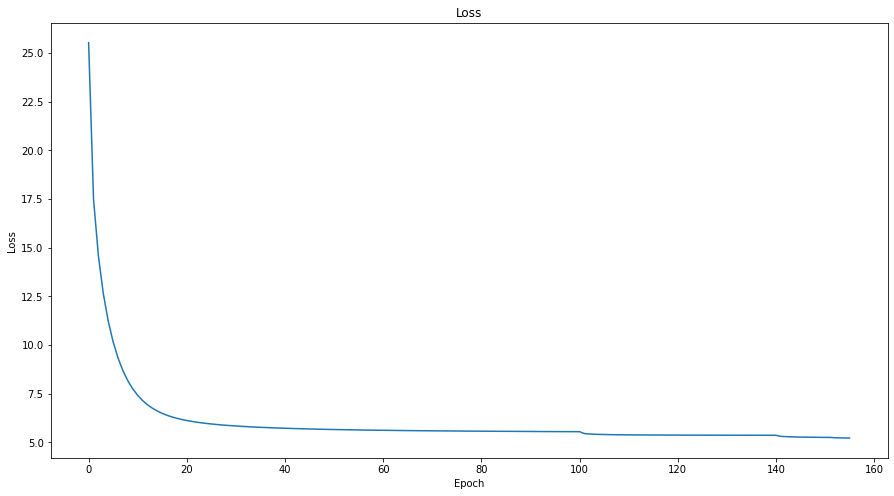

In [13]:
plt.figure(figsize=(15,8))
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_total)
#plt.plot(loss_total, label = 'train loss')
#plt.legend(loc="best")
plt.show()

In [ ]:
# ### TESTING ###
# test = test.values
# test = test.reshape(test[:].shape[0], test[:].shape[1])

# data_test = []
# #data_test = np.ones((1, 9))
# data_test = np.ones((1, 11))[np.newaxis,:]

# #x = np.hstack((data_np_re[:,1:7], data_np_re[:,8:11]))

# for i in range(test.shape[0]):
#     #print(i)
#     tmp = test[i,0]
#     indx = np.where(all_data[:,0]==tmp)
#     data_test = np.concatenate((data_test, xx[indx, :]),axis = 0)
# print(data_test.shape)

(4264, 1, 11)


In [ ]:
# data_test = data_test.reshape(4264,11)
# data_test = np.delete(data_test, 0 , axis = 0 )
# print(data_test.shape)

(4263, 11)


In [16]:
temp1 = np.dot(x_test, w_1)
temp2 = np.dot(np.power(x_test,2), w_2)
temp3 = np.dot(np.power(x_test,3), w_3)
temp4 = np.dot(np.power(x_test,4), w_4)
result = temp1 + temp2 + temp3 + temp4
print(result)

[[18.81154678]
 [30.3101633 ]
 [30.56932623]
 ...
 [14.27953441]
 [14.72334716]
 [17.08893737]]


In [ ]:
# result = np.concatenate((test[:,0][:,np.newaxis], result),axis = 1)

# pd.DataFrame(result).to_csv("./submission2.csv",index=0, header = ['ID', '1'])
# print(result) 

[[480.0 17.388467993784282]
 [742.0 29.310184268042747]
 [743.0 28.91159108587165]
 ...
 [37483.0 22.061840384644327]
 [37484.0 21.169498654069773]
 [37485.0 20.779543673861266]]


In [14]:
def output(filepath, data):
    df_SAMPLE = pd.DataFrame.from_dict(data)
    df_SAMPLE.to_csv(filepath, index=False)
    print('Success output to ' + filepath)

In [17]:

y_test['乳量'] = result
y_test.reset_index(inplace=True)
print(y_test.head(n=3))
output('models_results/1to4_5000_2000_800_500.csv', y_test)

    ID         乳量
0  480  18.811547
1  742  30.310163
2  743  30.569326
Success output to models_results/1to4_5000_2000_800_500.csv
